# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [63]:
import scipy.stats as st
from scipy.stats import binom
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here

fruits = 100
apples = 60
oranges = 40

p = apples/fruits
q = oranges/fruits
print('probability that the fruit is an apple ', p)
print('probability that the fruit is an orange ', q)

probability that the fruit is an apple  0.6
probability that the fruit is an orange  0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [9]:
# your code here

apple5 = p**5
orange15 = apple5 * q**15

print('probability that the first 5 fruits are all apples ', round(apple5, 3))
print('probability that the first 5 fruits are all apples and the next 15 fruits are all oranges ', 
      orange15)

# the result of orange15 can't be round to three decimal places, 
# otherwise we will have the answer as 0.0 what is not true, but close to that xD 

probability that the first 5 fruits are all apples  0.078
probability that the first 5 fruits are all apples and the next 15 fruits are all oranges  8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [32]:
# your code here

n = 20 # the number of trials for us means the number of fruits we took
x = 5 # number of appls we expect to receive in our 20 fruits sample

result = st.binom_test(x, n, p)
print('the probability that this time the sample contains 5 apples and 15 oranges', 
      round(result,3))

# i assumed that p is probability of success (take an apple) and q = 1-p is probability of 
# failure (take an orange), so we don't need to use two different variables here.
# if we know the probability of having 5 successes (apples) in a sample of 20 trials (fruits)
# it gives us a probability, that other 15 are failures (oranges)

the probability that this time the sample contains 5 apples and 15 oranges 0.002


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [48]:
# your code here

binomial = binom(n, p)
# probability that x < 5
print('the probability that less than 5 fruits picked are apples', 
      round(binomial_apples5.cdf(4), 4)) 

# round to three decimal places doesn't make sense because we will receive 0.0

the probability that less than 5 fruits picked are apples 0.0003


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

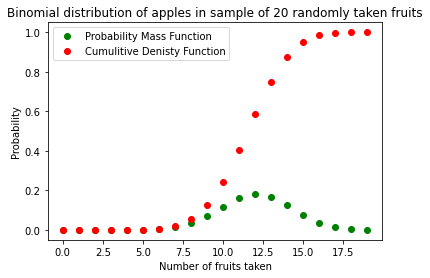

In [62]:
# your code here
# Please label the axes and give a title to the plot
x = np.arange(0, n)
plt.plot(x, binomial.pmf(x), 'go', label = 'Probability Mass Function')
plt.plot(x, binomial.cdf(x), 'ro', label = 'Cumulitive Denisty Function')
plt.title('Binomial distribution of apples in sample of 20 randomly taken fruits')
plt.xlabel('Number of fruits taken')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [64]:
# your code here
mu = 2.3
poisson_dist = poisson(mu)

In [66]:
print('the probability that the number of goals scored in a match is 5 ', 
      round(poisson_dist.pmf(5), 3))

the probability that the number of goals scored in a match is 5  0.054


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [67]:
# your code here
# Please label the axes and give a title to the plot 

print('the probability for the number of goals to be between 0 to 10 ', 
      round(poisson_dist.cdf(10), 3))

the probability for the number of goals to be between 0 to 10  1.0


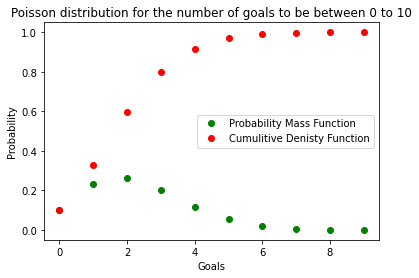

In [75]:
x = np.arange(0,10)
plt.plot(x, poisson_dist.pmf(x), 'go', label = 'Probability Mass Function')
plt.plot(x, poisson_dist.cdf(x), 'ro', label = 'Cumulitive Denisty Function')
plt.title('Poisson distribution for the number of goals to be between 0 to 10')
plt.xlabel('Goals')
plt.ylabel('Probability')
plt.legend()
plt.show()